In [522]:
from numpy.random import randint 
import numpy.random as rnd
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

Fai solo array dispari 

In [523]:
# parameters

modelPath = ""
modelName = "NNMedian.keras"

n_arrays = 2_000
array_length = 20
max_digit = 100
epochs = 40
batch_size = 128
neurons = 64

In [524]:
# calculate number of permutation 
print("number of permutation: ", max_digit**array_length)
print("percentage of view:", (n_arrays * 0.5) * 100 / max_digit**array_length, "%")

number of permutation:  1000000000000000000000000000000000000000000000000000000000000
percentage of view: 5e-55 %


In [525]:
# generate input and output data

input_arrays = []
label_arrays = []
for _ in range(n_arrays):
    # temp_array = rnd.normal(max_digit/2, max_digit/4, array_length).astype(int)
    #temp_array = randint(0, randint(max_digit // 4, max_digit), array_length)
    temp_label = np.sort(temp_array)
    input_arrays.append(temp_array)
    label_arrays.append(temp_label)

In [526]:
print(len(input_arrays), len(label_arrays))
print(input_arrays[:3])
print(label_arrays[:3])

10000 10000
[array([76, 76, 36, 34,  8, 64, 86, 42,  6, 31, 51, 66, 36, 34, 53, 46, 47,
       83, 23, 56, 71, 83, 55, 52, 38, 58, 52, -1, 55, 51]), array([-1, 17, 41, 67, 83, 63, -3, 61, 33, 86, 17, 34, 34, 58, 75, 71, 26,
       87, 56, 58, 42, 55, 34, 55, 39, 68, 50, 88, 48, 36]), array([57, 50, 17, 58, 42, 38, 26, 18, 28, 59, 63, 41, 54, 37, 74, 42, 51,
       52, 73, 10,  0, 13, 70, 40, 59, 11, 67, 24, 45, 45])]
[array([-1,  6,  8, 23, 31, 34, 34, 36, 36, 38, 42, 46, 47, 51, 51, 52, 52,
       53, 55, 55, 56, 58, 64, 66, 71, 76, 76, 83, 83, 86]), array([-3, -1, 17, 17, 26, 33, 34, 34, 34, 36, 39, 41, 42, 48, 50, 55, 55,
       56, 58, 58, 61, 63, 67, 68, 71, 75, 83, 86, 87, 88]), array([ 0, 10, 11, 13, 17, 18, 24, 26, 28, 37, 38, 40, 41, 42, 42, 45, 45,
       50, 51, 52, 54, 57, 58, 59, 59, 63, 67, 70, 73, 74])]


In [527]:
# normalize 

for i in range(len(input_arrays)):
    input_arrays[i] = input_arrays[i].astype("float32") / (max_digit - 1)
    label_arrays[i] = label_arrays[i].astype("float32") / (max_digit - 1)

In [528]:
# make np array 

input_arrays = np.array(input_arrays)
label_arrays = np.array(label_arrays)

In [529]:
print(input_arrays[:3])
print(label_arrays[:3])

[[ 0.7676768   0.7676768   0.36363637  0.34343433  0.08080808  0.64646465
   0.86868685  0.42424244  0.06060606  0.3131313   0.5151515   0.6666667
   0.36363637  0.34343433  0.53535354  0.46464646  0.47474748  0.83838385
   0.23232323  0.56565654  0.7171717   0.83838385  0.5555556   0.5252525
   0.3838384   0.5858586   0.5252525  -0.01010101  0.5555556   0.5151515 ]
 [-0.01010101  0.17171717  0.41414142  0.67676765  0.83838385  0.6363636
  -0.03030303  0.61616164  0.33333334  0.86868685  0.17171717  0.34343433
   0.34343433  0.5858586   0.75757575  0.7171717   0.26262626  0.8787879
   0.56565654  0.5858586   0.42424244  0.5555556   0.34343433  0.5555556
   0.3939394   0.68686867  0.5050505   0.8888889   0.4848485   0.36363637]
 [ 0.57575756  0.5050505   0.17171717  0.5858586   0.42424244  0.3838384
   0.26262626  0.18181819  0.28282827  0.5959596   0.6363636   0.41414142
   0.54545456  0.37373737  0.74747473  0.42424244  0.5151515   0.5252525
   0.7373737   0.1010101   0.          0.13

In [530]:
# split data 

n_train = int(0.5 * n_arrays)
n_val = int(0.25 * n_arrays)
n_eval = n_arrays - n_train - n_val

data_test = input_arrays[:n_train]
data_validation = input_arrays[n_train:(n_train+n_val)]
data_evaluation = input_arrays[n_train + n_val:]

label_test = label_arrays[:n_train]
label_validation = label_arrays[n_train:(n_train+n_val)]
label_evaluation = label_arrays[n_train + n_val:]

In [531]:
print(data_test.shape, data_validation.shape, data_evaluation.shape)
print(label_test.shape, label_validation.shape, label_evaluation.shape)

(5000, 30) (2500, 30) (2500, 30)
(5000, 30) (2500, 30) (2500, 30)


In [532]:
inputs = keras.Input(shape=(array_length))
x = layers.Dense(neurons, activation="relu") (inputs)
x = layers.Dense(neurons, activation="relu") (x)
x = layers.Dense(neurons, activation="relu") (x)
x = layers.Dense(neurons, activation="relu") (x)
outputs = layers.Dense(array_length, activation="sigmoid") (x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_83 (Dense)            (None, 64)                1984      
                                                                 
 dense_84 (Dense)            (None, 64)                4160      
                                                                 
 dense_85 (Dense)            (None, 64)                4160      
                                                                 
 dense_86 (Dense)            (None, 64)                4160      
                                                                 
 dense_87 (Dense)            (None, 30)                1950      
                                                                 
Total params: 16,414
Trainable params: 16,414
Non-trainabl

In [533]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["mae"]
    )

In [534]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
    filepath=modelPath + modelName, 
    monitor="val_mae", 
    save_best_only=True,)
    ]   

In [535]:
history = model.fit(
    data_test, 
    label_test, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_data=(data_validation, label_validation),
    callbacks=callbacks
    )

Epoch 1/40
10/10 [==============================] - 2s 55ms/step - loss: 0.6606 - mae: 0.1640 - val_loss: 0.6118 - val_mae: 0.1112
Epoch 2/40
10/10 [==============================] - 0s 12ms/step - loss: 0.5903 - mae: 0.0917 - val_loss: 0.5717 - val_mae: 0.0699
Epoch 3/40
10/10 [==============================] - 0s 12ms/step - loss: 0.5640 - mae: 0.0650 - val_loss: 0.5594 - val_mae: 0.0588
Epoch 4/40
10/10 [==============================] - 0s 11ms/step - loss: 0.5567 - mae: 0.0593 - val_loss: 0.5557 - val_mae: 0.0569
Epoch 5/40
10/10 [==============================] - 0s 9ms/step - loss: 0.5547 - mae: 0.0599 - val_loss: 0.5542 - val_mae: 0.0576
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5527 - mae: 0.0591 - val_loss: 0.5525 - val_mae: 0.0580
Epoch 7/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5515 - mae: 0.0612 - val_loss: 0.5506 - val_mae: 0.0587
Epoch 8/40
10/10 [==============================] - 0s 9ms/step - loss: 0.5491 - mae: 

In [536]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_epochs = range(1, len(val_mae) + 1)

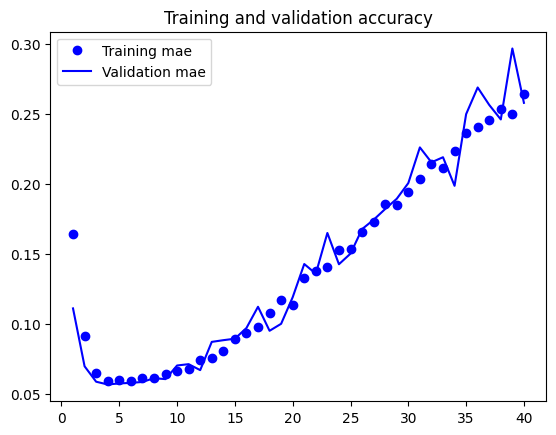

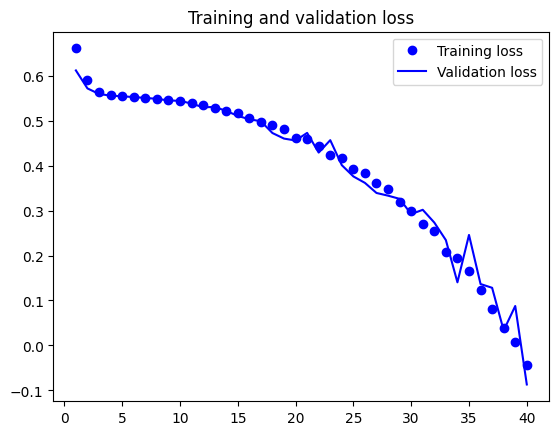

In [537]:
plt.plot(x_epochs, mae, "bo", label="Training mae")
plt.plot(x_epochs, val_mae, "b", label="Validation mae")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(x_epochs, loss, "bo", label="Training loss")
plt.plot(x_epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [538]:
model_best = keras.models.load_model(modelPath + modelName)

eval_loss, eval_mae = model_best.evaluate(data_evaluation, label_evaluation)
eval_mae_perc = eval_mae * (max_digit - 1)

print(f"Evaluation accuracy: {eval_mae:.3f}")
print(f"Evaluation mae denormalized: {eval_mae_perc:.2f}")

79/79 [==============================] - 1s 3ms/step - loss: 0.5551 - mae: 0.0582
Evaluation accuracy: 0.058
Evaluation mae denormalized: 5.76


In [539]:
def denormalize(x):
    x = x * (max_digit - 1)
    return x

def rounding(x):
    x = round(x, 0)
    return x

predictions = model_best.predict(data_evaluation)
targets = label_evaluation

79/79 [==============================] - 0s 3ms/step


In [540]:
# denormalize and round 

predictions_denorm = []
targets_denorm = []
for i in range(len(predictions)):
    temp_pred_denorm_array = []
    temp_targ_denorm_array = []
    for ii in range(array_length):
        temp_pred_denorm_array.append(rounding(denormalize(float(predictions[i][ii]))))
        temp_targ_denorm_array.append(rounding(denormalize(targets[i][ii])))
    predictions_denorm.append(temp_pred_denorm_array)
    targets_denorm.append(temp_targ_denorm_array)

print(len(predictions_denorm), len(targets_denorm))
print(predictions_denorm[:3])
print(targets_denorm[:3])

2500 2500
[[2.0, 10.0, 18.0, 21.0, 25.0, 30.0, 30.0, 31.0, 38.0, 38.0, 40.0, 43.0, 46.0, 47.0, 48.0, 50.0, 54.0, 52.0, 58.0, 61.0, 59.0, 61.0, 66.0, 67.0, 72.0, 74.0, 78.0, 83.0, 90.0, 99.0], [2.0, 9.0, 16.0, 20.0, 24.0, 30.0, 30.0, 32.0, 38.0, 36.0, 40.0, 44.0, 47.0, 46.0, 46.0, 48.0, 53.0, 52.0, 58.0, 59.0, 58.0, 62.0, 68.0, 69.0, 72.0, 74.0, 79.0, 84.0, 91.0, 99.0], [2.0, 9.0, 17.0, 19.0, 25.0, 27.0, 28.0, 31.0, 36.0, 38.0, 39.0, 44.0, 46.0, 47.0, 47.0, 50.0, 53.0, 52.0, 58.0, 62.0, 60.0, 62.0, 67.0, 69.0, 73.0, 77.0, 78.0, 85.0, 91.0, 99.0]]
[[9.0, 10.0, 23.0, 26.0, 26.0, 28.0, 29.0, 33.0, 34.0, 34.0, 38.0, 42.0, 43.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 52.0, 56.0, 57.0, 58.0, 58.0, 59.0, 60.0, 66.0, 71.0, 87.0, 93.0], [-3.0, 1.0, 5.0, 16.0, 27.0, 28.0, 31.0, 31.0, 36.0, 37.0, 37.0, 38.0, 39.0, 42.0, 48.0, 52.0, 52.0, 54.0, 65.0, 66.0, 68.0, 71.0, 71.0, 75.0, 78.0, 81.0, 83.0, 83.0, 90.0, 90.0], [-4.0, 0.0, 6.0, 8.0, 10.0, 12.0, 23.0, 28.0, 33.0, 34.0, 40.0, 40.0, 40.0, 50.0, 50.0

In [553]:
# plot the prediction and target by merging all the arrays 

index_x = 0
x_merged = []
pred_merged = []
targ_merged = []
errs = []
for i in range(len(predictions_denorm)):
    err = 0
    for ii in range(array_length):
        index_x += 1
        x_merged.append(index_x)
        err += predictions_denorm[i][ii] / targets_denorm[i][ii]
        pred_merged.append(predictions_denorm[i][ii])
        targ_merged.append(targets_denorm[i][ii])
    errs.append(err)

/var/folders/4h/b9kx8pbj3cnccv7pss_lhq9w0000gn/T/ipykernel_84816/2768737831.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  err += predictions_denorm[i][ii] / targets_denorm[i][ii] + 0.01


In [542]:
print("array_length: ", array_length)
print(len(pred_merged), len(targ_merged))
print(pred_merged[:(3*array_length)])
print(targ_merged[:(3*array_length)])

array_length:  30
75000 75000
[2.0, 10.0, 18.0, 21.0, 25.0, 30.0, 30.0, 31.0, 38.0, 38.0, 40.0, 43.0, 46.0, 47.0, 48.0, 50.0, 54.0, 52.0, 58.0, 61.0, 59.0, 61.0, 66.0, 67.0, 72.0, 74.0, 78.0, 83.0, 90.0, 99.0, 2.0, 9.0, 16.0, 20.0, 24.0, 30.0, 30.0, 32.0, 38.0, 36.0, 40.0, 44.0, 47.0, 46.0, 46.0, 48.0, 53.0, 52.0, 58.0, 59.0, 58.0, 62.0, 68.0, 69.0, 72.0, 74.0, 79.0, 84.0, 91.0, 99.0, 2.0, 9.0, 17.0, 19.0, 25.0, 27.0, 28.0, 31.0, 36.0, 38.0, 39.0, 44.0, 46.0, 47.0, 47.0, 50.0, 53.0, 52.0, 58.0, 62.0, 60.0, 62.0, 67.0, 69.0, 73.0, 77.0, 78.0, 85.0, 91.0, 99.0]
[9.0, 10.0, 23.0, 26.0, 26.0, 28.0, 29.0, 33.0, 34.0, 34.0, 38.0, 42.0, 43.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 52.0, 56.0, 57.0, 58.0, 58.0, 59.0, 60.0, 66.0, 71.0, 87.0, 93.0, -3.0, 1.0, 5.0, 16.0, 27.0, 28.0, 31.0, 31.0, 36.0, 37.0, 37.0, 38.0, 39.0, 42.0, 48.0, 52.0, 52.0, 54.0, 65.0, 66.0, 68.0, 71.0, 71.0, 75.0, 78.0, 81.0, 83.0, 83.0, 90.0, 90.0, -4.0, 0.0, 6.0, 8.0, 10.0, 12.0, 23.0, 28.0, 33.0, 34.0, 40.0, 40.0, 40.0, 5

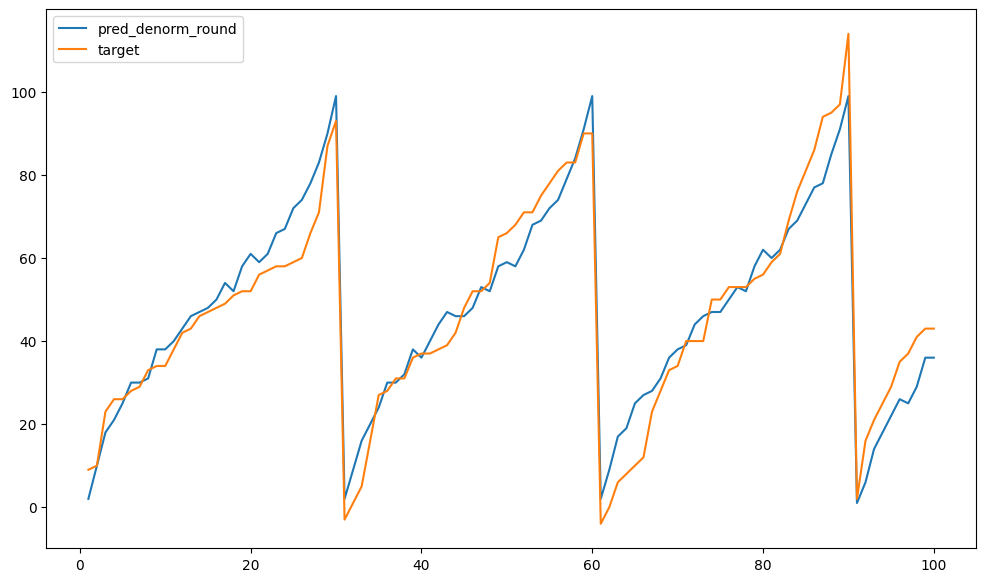

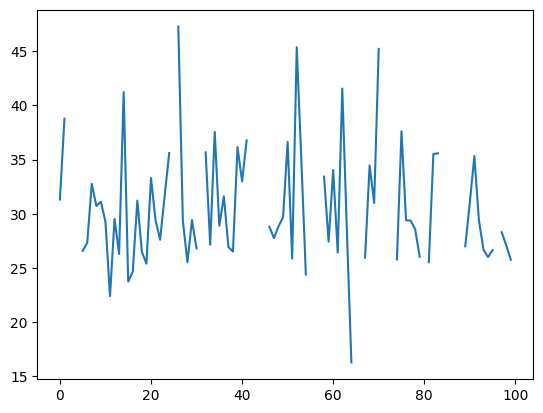

In [554]:
plot_length = 100

plt.figure(figsize=(12, 7))
plt.plot(x_merged[:plot_length], pred_merged[:plot_length], label="pred_denorm_round")
plt.plot(x_merged[:plot_length], targ_merged[:plot_length], label="target")
plt.legend(loc="upper left")
plt.show()

plt.plot(np.arange(0, plot_length, 1), errs[:plot_length], label="pred_denorm_round")